In [2]:
import networkx as nx
import numpy as np

In [3]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v


def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

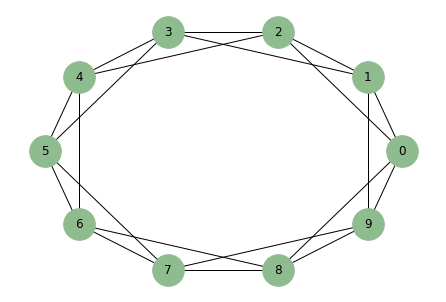

In [4]:
lattice = make_ring_lattice(10, 4)

nx.draw_circular(lattice,
                    node_color='darkseagreen',
                    node_size=1000,
                    with_labels=True)

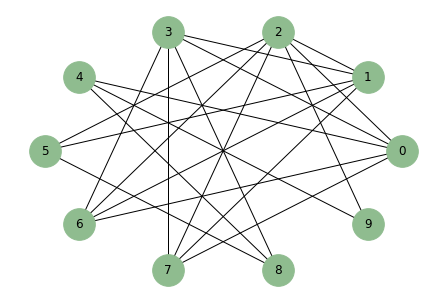

In [71]:
def flip(p):
    return np.random.random() < p


def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u,v


def rewire(G:nx.Graph, p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)


def make_ws_graph(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire(ws, p)

    return ws


lattice = make_ring_lattice(10, 4)
rewire(lattice, 1)
nx.draw_circular(lattice,
                    node_color='darkseagreen',
                    node_size=1000,
                    with_labels=True)
                

In [6]:
def node_clustering(G:nx.Graph, u):
    neighbors = G[u]
    k = len(neighbors)
    if k<2:
        return np.nan
    
    possible = k * (k-1)/2
    exist = 0
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist += 1
    return exist/possible


def clustering_coefficient(G):
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

lattice = make_ring_lattice(10, 4)
rewire(lattice, 1)
clustering_coefficient(lattice)

0.6407407407407408

In [16]:
def path_lengths(G):
    length_iter = nx.shortest_path_length(G)
    for source, dist_map in length_iter:
        for destination, distance in dist_map.items():
            if source != destination:
                yield distance
    

def characteristic_path_length(G):
    return np.mean(list(path_lengths(G)))

lattice = make_ring_lattice(3, 2)
characteristic_path_length(lattice)

1.0

In [ ]:
def run_one_graph(n, k, p):
    ws = make_ws_graph(n, k, p)
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    return mpl, cc


def run_experiment(ps, n=1000, k=10, iters=20):
    res = []
    for p in ps:
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        res.append(means)
    
    return np.array(res)


ps = np.logspace(-1, 0, 9)
run_experiment(ps)